> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Load the Dataset

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Investigate the dataset

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [134]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [96]:
df.duplicated().sum()

1

- Issues
    - one duplicate
    - `id` should be string
    - add '0' to ids
    - `release_date` should be datetime

#### `release_year` column

In [97]:
#Search for categorical variables
df['release_year'].value_counts().sort_values(ascending=False).head(15)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
Name: release_year, dtype: int64

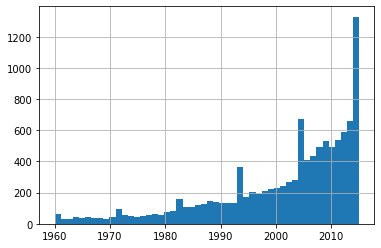

In [98]:
df['release_year'].hist(bins=50);

#### `director` column

In [99]:
df['director'].value_counts().sort_values(ascending=False).head(15)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Wes Craven           19
Tim Burton           19
David Cronenberg     18
Rob Reiner           18
John Carpenter       18
Name: director, dtype: int64

#### `original_title` column

In [100]:
df['original_title'].value_counts().head(15)

Hamlet                  4
Julia                   3
Jane Eyre               3
Frankenstein            3
A Christmas Carol       3
Life                    3
Emma                    3
Wuthering Heights       3
Alice in Wonderland     3
Oliver Twist            3
Annie                   3
Beauty and the Beast    3
Carrie                  3
Shelter                 3
Hercules                3
Name: original_title, dtype: int64

It's not strange that there are many repeated titles, because famous movies are re-acted but let's check!

In [101]:
df[df['original_title'] == 'Hamlet']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",...,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,...,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07


In [102]:
df[df['original_title'] == 'Carrie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4101,7342,tt0319970,0.257263,0,0,Carrie,Angela Bettis|Patricia Clarkson|Rena Sofer|Kan...,NaN,David Carson,NaN,...,Carrie White is a lonely and painfully shy tee...,132,Drama|Horror,MGM Television|Trilogy Entertainment Group,11/4/02,53,5.5,2002,0.000000e+00,0.000000e+00
5486,133805,tt1939659,1.412233,30000000,82394288,Carrie,ChloÃ« Grace Moretz|Julianne Moore|Judy Greer|...,http://www.carrie-movie.com,Kimberly Peirce,Know her name. Fear her power.,...,A reimagining of the classic horror tale about...,100,Drama|Horror,Screen Gems|Metro-Goldwyn-Mayer (MGM)|Misher F...,10/16/13,897,5.8,2013,2.808100e+07,7.712380e+07
10175,7340,tt0074285,1.263483,1800000,33800000,Carrie,Sissy Spacek|Piper Laurie|Amy Irving|William K...,NaN,Brian De Palma,If youâ€™ve got a taste for terror... take Car...,...,"Carrie may be ostracized, but the shy teen has...",98,Horror|Thriller,United Artists,11/3/76,497,6.8,1976,6.897056e+06,1.295114e+08


In [103]:
df[df['original_title'] == 'Annie']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
724,196867,tt1823664,1.588010,65000000,133821816,Annie,QuvenzhanÃ© Wallis|Jamie Foxx|Rose Byrne|Camer...,NaN,Will Gluck,It's a Hard Knock Life,...,"Ever since her parents left her as a baby, lit...",119,Music|Comedy|Drama|Family,Columbia Pictures|Sony Pictures Entertainment ...,12/19/14,331,6.1,2014,5.987092e+07,1.232621e+08
2485,26177,tt0207972,0.548720,0,0,Annie,Kathy Bates|Victor Garber|Alan Cumming|Audra M...,NaN,Rob Marshall,Disney makes the classical musical more magica...,...,Eleven-year-old Annie has been living in an or...,90,Music|Family|Comedy,Walt Disney Television|Storyline Entertainment...,11/7/99,35,5.5,1999,0.000000e+00,0.000000e+00
8920,15739,tt0083564,0.421748,50000000,57059003,Annie,Aileen Quinn|Albert Finney|Carol Burnett|Ann R...,NaN,John Huston,The movie of 'Tomorrow',...,An orphan in a facility run by the mean Miss H...,127,Comedy|Drama|Family|Music,Columbia Pictures|Rastar Pictures,6/18/82,99,6.2,1982,1.129821e+08,1.289329e+08


Cool, they're not duplicates. No worries here.

#### `homepage` column

In [104]:
df['homepage'].isnull().sum()

7930

In [105]:
df['homepage'].sample(10)

253                                                    NaN
10778                                                  NaN
9008                                                   NaN
4170                                                   NaN
9227                                                   NaN
4068                                                   NaN
1329     http://www.starwars.com/films/star-wars-episod...
8653                                                   NaN
2560                                                   NaN
5802     http://www.sonypictures.com/previews/homevideo...
Name: homepage, dtype: object

Looks like the column `homepage` won't be of much use, since it's has many nans

#### `tagline` column

In [106]:
# Can't really imagine what tagline column might be like
df['tagline'].sample(10)

6559          Every Second Chance Begins With a First Step
6109                           Guess Who's Coming To Town!
9414                             There's Magic In The Air.
4712                                       Face Your Fears
9550     Trapped behind enemy lines. A whole army after...
8836     He fell in love for the first time. She fell i...
8298     He needed to trust her with his secret. She ha...
3712                                                   NaN
10257               Keaton & Allen reunited for fun flick!
10379    She's got a little secret and a lot of explain...
Name: tagline, dtype: object

In [107]:
df['tagline'].isnull().sum()

2824

#### `keywords` column

In [108]:
df['keywords'].sample(10)

10450    amateur detective|heart attack|horseback ridin...
919              anthology|woman director|horror anthology
4588     surgeon|teenager|domineering mother|awkwardnes...
3737                                  concert|live concert
4630     based on novel|high school|teenager|teen comed...
10723    mutant|greenhouse|carnivorous plant|radioactiv...
7629                robbery|treasure|cello|daughter|father
7373          female nudity|rape|boat|mass murder|mutation
7223         rape|trauma|high school|independent film|mute
3543         roman empire|slavery|ancient rome|eagle|honor
Name: keywords, dtype: object

In [109]:
df['keywords'].value_counts().head(15)

woman director                     134
independent film                    82
sport                               25
suspense                            24
duringcreditsstinger                24
musical                             24
stand-up|stand up comedy            16
holiday                             16
biography                           15
independent film|woman director     13
stand up comedy                      9
christmas                            7
holiday|christmas                    7
dystopia                             7
found footage                        7
Name: keywords, dtype: int64

#### `overview` column

In [110]:
df['overview'].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                        13
1960. The thrilling battles waged by a band of kids from two rival villages in the southern French countryside.                                                                                                                                                                                                                                                                                                                            2
In the year of 2039, after World Wars destroy much of the civilization as we know it, territories are no longer run by governments, but by cor

#### `production_companies` column

In [111]:
df['production_companies'].value_counts().head(25)

Paramount Pictures                              156
Universal Pictures                              133
Warner Bros.                                     84
Walt Disney Pictures                             76
Columbia Pictures                                72
Metro-Goldwyn-Mayer (MGM)                        72
New Line Cinema                                  61
Touchstone Pictures                              51
20th Century Fox                                 50
Twentieth Century Fox Film Corporation           49
TriStar Pictures                                 45
Orion Pictures                                   42
Miramax Films                                    32
Columbia Pictures Corporation                    31
DreamWorks Animation                             31
Pixar Animation Studios                          30
Walt Disney Productions                          29
Dimension Films                                  28
United Artists                                   23
Imagine Ente

#### `release_date` column

In [112]:
df['release_date'].sample(10)

5755      7/6/13
9187     12/1/89
6217     9/30/05
3702      8/4/11
5063    10/29/03
3763      6/4/11
4861     1/31/12
5243     8/15/97
2005      6/4/10
3281      2/3/08
Name: release_date, dtype: object

#### `vote_count` column

In [113]:
df['vote_count'].sample(10)

979      14
2817     11
911      30
5549    637
4652     23
5748     49
1694    254
7736     17
6264    185
9567     13
Name: vote_count, dtype: int64

In [114]:
#to get a sense of the numbers
df['vote_count'].describe()

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64

#### `popularity` column

In [115]:
#to get a sense of the numbers
df['popularity'].describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

In [116]:
df['popularity'].min()

6.500000000000001e-05

In [117]:
df[df['popularity'] == df['popularity'].min()] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.0,0.0


Runtime is 561 mins which is wierd!!

#### `runtime` column

In [118]:
sum(df['runtime'] >= 180)

145

Apparantly, there's something wrong

In [119]:
df[df['runtime'] >= 180].sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6829,134777,tt0830361,0.265388,0,0,The Lost Room,Peter Krause|Julianna Margulies|Kevin Pollak|R...,NaN,Craig R. Baxley|Michael W. Watkins,NaN,...,Peter Krause (Six Feet Under) heads up the ste...,270,Action|Fantasy|Mystery,Lions Gate|Motel Man Productions,12/9/06,28,7.2,2006,0.000000e+00,0.000000e+00
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.000000e+00,0.000000e+00
8221,55676,tt0112120,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,NaN,Martin Scorsese|Michael Henry Wilson,NaN,...,Martin Scorsese celebrates American movies fro...,225,Documentary,Miramax Films|British Film Institute (BFI),5/21/95,11,8.5,1995,0.000000e+00,0.000000e+00
6141,34573,tt0088693,0.350256,0,0,Alice in Wonderland,Natalie Gregory|Sheila Allen|Sharee Gregory|Re...,NaN,Harry Harris,NaN,...,Classic tale of a girl named Alice who follows...,187,Fantasy|Family,NaN,12/9/85,13,6.2,1985,0.000000e+00,0.000000e+00
2642,676,tt0213149,2.478879,140000000,449220945,Pearl Harbor,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,NaN,Michael Bay,"December 7, 1941 - A day that shall live in in...",...,The lifelong friendship between Rafe McCawley ...,183,History|Romance|War,Jerry Bruckheimer Films|Touchstone Pictures,5/21/01,1044,6.6,2001,1.724083e+08,5.532103e+08


The dataset has movies and series/miniseries which is considered a tidiness issue

#### `genres` column

In [120]:
df['genres'].value_counts().sort_values(ascending=False).head(15)

Drama                   712
Comedy                  712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Name: genres, dtype: int64

#### `budget` & `budget_adj` columns

In [121]:
#to get a sense of the range of values in the budget column
df['budget'].describe()

count    1.086600e+04
mean     1.462570e+07
std      3.091321e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [122]:
#because it doesn't make sense to have a budget of zero
df[df['budget'] == 0].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6387,15258,tt0436078,0.261343,0,0,The Aristocrats,Jason Alexander|Chris Albrecht|Hank Azaria|She...,NaN,Paul Provenza,100 Superstar Comedians. One Very Dirty Joke.,...,One hundred superstar comedians tell the same ...,89,Comedy|Documentary,Mighty Cheese Productions,1/1/05,18,5.8,2005,0.0,0.000000e+00
1286,250777,tt2174896,0.190655,0,0,To Be Takei,George Takei|Leonard Nimoy|William Shatner|Nic...,http://tobetakei.com/,Jennifer M. Kroot,NaN,...,"Over seven decades, actor and activist George ...",94,Documentary,Rainbow Shooting Star Pictures|Dodgeville Films,8/22/14,15,6.5,2014,0.0,0.000000e+00
7879,40842,tt0079638,0.058087,0,22228000,Norma Rae,Sally Field|Beau Bridges|Ron Leibman|Pat Hingl...,NaN,Martin Ritt,The story of a woman with the courage to risk ...,...,Norma Rae is a southern textile worker employe...,110,Drama,Twentieth Century Fox Film Corporation,3/2/79,13,5.8,1979,0.0,6.678523e+07


In [123]:
# let's check if we can fix them by using the 2010 dollar values
df['budget_adj'].min()

0.0

In [124]:
df['budget_adj'].describe()

count    1.086600e+04
mean     1.755104e+07
std      3.430616e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

#### `revenue` & `revenue_adj` columns

In [125]:
# to get a sense of the range of values in revenue
df['revenue'].describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [126]:
sum(df['revenue'] == 0)

6016

In [127]:
sum(df['revenue'] != 0)

4850

In [128]:
# to get a sense of the range of values in revenue
df['revenue_adj'].describe()

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [129]:
df[df['revenue'] == df['revenue'].min()].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3760,98344,tt2007993,0.191228,25000000,0,è³½å¾·å…‹Â·å·´èŠ (ä¸Š) å¤ªé™½æ——,Umin Boya|Chi-Wei Cheng|Lin Ching-Tai|Masanobu...,NaN,Te-Sheng Wei,A man rises up to lead his people in a brave a...,...,Mouna Rudo was born and raised among the Seedi...,144,Drama|Action|History,ARS Film Production,4/9/11,11,6.0,2011,2.423495e+07,0.0
8855,19349,tt0278793,0.130377,0,0,The Up in Smoke Tour,Ice Cube|Eminem|Dr. Dre|Snoop Dogg|Nate Dogg,NaN,Philip G. Atwell,Smoke Weed Everyday,...,The Up in Smoke Tour is a West Coast hip hop t...,119,Documentary|Music,Eagle Rock Entertainment,12/2/00,12,7.5,2000,0.000000e+00,0.0
6145,17898,tt0090021,0.328682,0,0,Silver Bullet,Gary Busey|Everett McGill|Corey Haim|Megan Fol...,NaN,Daniel Attias,It started in May. In a small town. And every ...,...,The small city of Tarker's Mill is startled by...,95,Horror,Paramount Pictures|Famous Films (II),10/11/85,43,5.6,1985,0.000000e+00,0.0


In [130]:
df[df['revenue_adj'] == df['revenue_adj'].min()].sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
825,256835,tt3473654,0.707208,0,0,Toy Story That Time Forgot,Tom Hanks|Tim Allen|Joan Cusack|Kristen Schaal...,NaN,Steve Purcell,NaN,...,"During a post-Christmas play date, the gang fi...",22,Animation|Family,Pixar Animation Studios,12/2/14,169,6.9,2014,0.0,0.0
10396,26672,tt0112389,0.014992,0,0,The Thief and the Cobbler,Vincent Price|Anthony Quayle|Sean Connery|Joan...,NaN,Richard Williams,NaN,...,It is written among the limitless constellatio...,72,Fantasy|Animation|Science Fiction|Family,Richard Williams Productions,9/23/93,14,6.3,1993,0.0,0.0
377,357681,tt4973112,0.198522,0,0,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,http://hittingtheapexfilm.com/,Mark Neale,NaN,...,'Hitting the Apex' is the inside story of six ...,138,Documentary,First Movie Companie,9/2/15,14,8.0,2015,0.0,0.0


#### `vote_average` column

In [131]:
# to get a sense of the vote average
df['vote_average'].describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [132]:
df['vote_average'].value_counts().head(15)

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
6.3    461
6.5    457
6.4    446
5.7    415
6.6    413
5.6    412
5.5    380
6.7    376
5.3    358
5.4    338
Name: vote_average, dtype: int64

This means that `vote_average` ranges from 1 to 10.

To sum up the issues that need to be solved
- one duplicate
- `id` should be string
- add '0' to ids
- `release_date` should be datetime
- Remove the series and miniseries into a separate table

To sum up the questions that need to be answered
- which genres are most popular every year?
- high revenue movies vs (genre, budget, director, runtime, production company)
- popularity vs (genre, director, budget, runtime, production company)
- title vs (popularity, vote average, homepage, genre, director, production company)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [145]:
# Make a copy of the clean data
movies = df.copy()

#### Removing the duplicate

In [146]:
movies.drop_duplicates(inplace=True)

In [147]:
# Just to check
movies.duplicated().sum()

0

#### Fixing the `id` column

In [148]:
movies['id'].dtype

dtype('int64')

In [139]:
for id
movies['id'] = str(movies['id'])

In [140]:
# To check
movies['id'].dtype

dtype('O')

In [144]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0 135397\n1 76341\n2 262...,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,0 135397\n1 76341\n2 262...,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,0 135397\n1 76341\n2 262...,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,0 135397\n1 76341\n2 262...,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,0 135397\n1 76341\n2 262...,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Fixing the `release_date` column

#### Splitting the table into 2 tables

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!